# Analysis of NYC Taxi Data - July 2018

## Setup

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize'] = [10, 5]

In [3]:
import pandas as pd
import numpy as np

In [4]:
pd.set_option('display.max_columns', 40)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [6]:
import Plotting
Plotting.plotly.offline.init_notebook_mode(connected=True)

## Extract, Transform, Load

In [7]:
#df = pd.read_csv('/Users/Delta/Downloads/trip_fare_4.csv',encoding='utf-8-sig')
#df = pd.read_csv('/Users/Delta/Downloads/trip_fare_4.csv')
#df = pd.read_csv('/Users/Delta/Downloads/trip_fare_4.csv',nrows=200)   #skiprows=100
#df = pd.read_csv('/Users/Delta/Downloads/trip_fare_4.csv',nrows=2,encoding='utf-8-sig')   #skiprows=100

df=pd.read_hdf('data_taxi_merged.h5', 'df')

### Get initial feel for data and quality

In [8]:
df.shape

(15100468, 21)

In [9]:
peek=df.head(5)

In [10]:
peek

,medallion,hack_license,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,rate_code,dropoff_datetime,dropoff_latitude,dropoff_longitude,passenger_count,pickup_latitude,pickup_longitude,store_and_fwd_flag,trip_distance,trip_time_in_secs
0,91F6EB84975BBC867E32CB113C7C2CD5,AD8751110E6292079EB10EB9481FE1A6,CMT,2013-04-04 18:47:45,CRD,11.0,1.0,0.5,2.50,0.0,15.00,1,2013-04-04 19:00:25,40.785648,-73.976273,1,40.765320,-73.957855,N,2.5,759
1,EC34CD1B3797DFAFF3FE099BA87B6656,8FE6A4AEDF89B6B4E19D2377FD3FB7D7,CMT,2013-04-05 07:08:34,CRD,8.5,0.0,0.5,1.80,0.0,10.80,1,2013-04-05 07:17:34,0.000000,0.000000,1,0.000000,0.000000,N,1.6,540
2,C1B9DA774DC2BBC6DE27CE994E7F44A0,E1B595FD55E4C82C1E213EB17438107A,CMT,2013-04-04 17:59:50,CRD,16.5,1.0,0.5,3.60,0.0,21.60,1,2013-04-04 18:21:48,40.715374,-74.009186,1,40.754990,-73.982880,N,3.6,1318
3,9BA84250355AB3FC031C9252D395BF8A,16BB0D96A0DCC853AEC7F55C8D6C71E0,CMT,2013-04-04 18:12:01,CRD,10.0,1.0,0.5,3.45,0.0,14.95,1,2013-04-04 18:25:24,40.776642,-73.955666,1,40.763451,-73.978119,N,1.9,799
4,205A696DF62AD03C88DA8C5EC5248639,579C41EA5EC846F8B641A42F9EE3E855,CMT,2013-04-04 20:12:57,CRD,15.0,0.5,0.5,3.20,0.0,19.20,1,2013-04-04 20:29:55,40.761082,-73.961662,1,40.744755,-74.006371,N,3.6,1017


In [11]:
df.dtypes

medallion               object
 hack_license           object
 vendor_id              object
 pickup_datetime        object
 payment_type           object
 fare_amount           float64
 surcharge             float64
 mta_tax               float64
 tip_amount            float64
 tolls_amount          float64
 total_amount          float64
 rate_code               int64
 dropoff_datetime       object
 dropoff_latitude      float64
 dropoff_longitude     float64
 passenger_count         int64
 pickup_latitude       float64
 pickup_longitude      float64
 store_and_fwd_flag     object
 trip_distance         float64
 trip_time_in_secs       int64
dtype: object

In [12]:
df.isnull().sum()

medallion                    0
 hack_license                0
 vendor_id                   0
 pickup_datetime             0
 payment_type                0
 fare_amount                 0
 surcharge                   0
 mta_tax                     0
 tip_amount                  0
 tolls_amount                0
 total_amount                0
 rate_code                   0
 dropoff_datetime            0
 dropoff_latitude          146
 dropoff_longitude         146
 passenger_count             0
 pickup_latitude             0
 pickup_longitude            0
 store_and_fwd_flag    7518657
 trip_distance               0
 trip_time_in_secs           0
dtype: int64

In [13]:
df.isna().sum()

medallion                    0
 hack_license                0
 vendor_id                   0
 pickup_datetime             0
 payment_type                0
 fare_amount                 0
 surcharge                   0
 mta_tax                     0
 tip_amount                  0
 tolls_amount                0
 total_amount                0
 rate_code                   0
 dropoff_datetime            0
 dropoff_latitude          146
 dropoff_longitude         146
 passenger_count             0
 pickup_latitude             0
 pickup_longitude            0
 store_and_fwd_flag    7518657
 trip_distance               0
 trip_time_in_secs           0
dtype: int64

In [14]:
df.describe()

,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,rate_code,dropoff_latitude,dropoff_longitude,passenger_count,pickup_latitude,pickup_longitude,trip_distance,trip_time_in_secs
count,1.510047e+07,1.510047e+07,1.510047e+07,1.510047e+07,1.510047e+07,1.510047e+07,1.510047e+07,1.510032e+07,1.510032e+07,1.510047e+07,1.510047e+07,1.510047e+07,1.510047e+07,1.510047e+07
mean,1.227417e+01,3.266898e-01,4.983206e-01,1.345662e+00,2.446353e-01,1.468948e+01,1.033242e+00,4.004795e+01,-7.269257e+01,1.709030e+00,4.006861e+01,-7.273425e+01,2.862899e+00,7.466081e+02
std,9.958736e+00,3.673146e-01,2.892903e-02,2.131956e+00,1.185930e+00,1.194023e+01,3.451167e-01,6.977638e+00,9.858587e+00,1.385621e+00,6.956628e+00,9.731627e+00,3.344187e+00,5.504414e+02
min,2.500000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+00,0.000000e+00,-3.547898e+03,-2.771290e+03,0.000000e+00,-3.481141e+03,-2.323420e+03,0.000000e+00,0.000000e+00
25%,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,8.000000e+00,1.000000e+00,4.073417e+01,-7.399143e+01,1.000000e+00,4.073512e+01,-7.399213e+01,1.040000e+00,3.600000e+02
50%,9.500000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.100000e+01,1.000000e+00,4.075333e+01,-7.398007e+01,1.000000e+00,4.075281e+01,-7.398172e+01,1.780000e+00,6.000000e+02
75%,1.400000e+01,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,1.650000e+01,1.000000e+00,4.076832e+01,-7.396362e+01,2.000000e+00,4.076754e+01,-7.396676e+01,3.200000e+00,9.600000e+02
max,5.000000e+02,1.500000e+01,5.000000e-01,2.000000e+02,2.000000e+01,6.281000e+02,2.100000e+02,3.577126e+03,2.228746e+03,9.000000e+00,3.210393e+03,2.228722e+03,1.000000e+02,1.080000e+04


In [15]:
df[' fare_amount'].skew()

3.724584648821671

In [16]:
df.columns

Index(['medallion', ' hack_license', ' vendor_id', ' pickup_datetime',
       ' payment_type', ' fare_amount', ' surcharge', ' mta_tax',
       ' tip_amount', ' tolls_amount', ' total_amount', ' rate_code',
       ' dropoff_datetime', ' dropoff_latitude', ' dropoff_longitude',
       ' passenger_count', ' pickup_latitude', ' pickup_longitude',
       ' store_and_fwd_flag', ' trip_distance', ' trip_time_in_secs'],
      dtype='object')

## Transform and Enhance data

In [17]:
pickup_dt=pd.to_datetime(df[' pickup_datetime'])
#pickup_dt=pd.Timestamp(df[' pickup_datetime'])

In [18]:
pickup_dt

0          2013-04-04 18:47:45
1          2013-04-05 07:08:34
2          2013-04-04 17:59:50
3          2013-04-04 18:12:01
4          2013-04-04 20:12:57
5          2013-04-05 02:48:11
6          2013-04-05 06:16:10
7          2013-04-05 06:20:10
8          2013-04-04 19:20:16
9          2013-04-03 18:05:38
10         2013-04-03 18:04:40
11         2013-04-03 18:07:31
12         2013-04-03 18:02:54
13         2013-04-04 19:19:42
14         2013-04-04 19:12:32
15         2013-04-05 14:42:31
16         2013-04-05 14:56:55
17         2013-04-04 07:23:21
18         2013-04-03 20:17:03
19         2013-04-03 20:22:41
20         2013-04-03 18:40:50
21         2013-04-03 18:42:01
22         2013-04-03 19:05:55
23         2013-04-03 19:24:08
24         2013-04-03 19:30:16
25         2013-04-05 00:15:15
26         2013-04-04 18:38:52
27         2013-04-04 18:51:12
28         2013-04-04 18:12:42
29         2013-04-04 20:20:30
                   ...        
15100438   2013-04-16 22:42:00
15100439

In [19]:
#pickup_dt.astype('datetime64[s]')
[pickup_dt.dt.hour, pickup_dt.dt.minute, pickup_dt.dt.weekday_name]

[0           18
 1            7
 2           17
 3           18
 4           20
 5            2
 6            6
 7            6
 8           19
 9           18
 10          18
 11          18
 12          18
 13          19
 14          19
 15          14
 16          14
 17           7
 18          20
 19          20
 20          18
 21          18
 22          19
 23          19
 24          19
 25           0
 26          18
 27          18
 28          18
 29          20
             ..
 15100438    22
 15100439    22
 15100440    22
 15100441    22
 15100442    19
 15100443    19
 15100444    19
 15100445    19
 15100446    19
 15100447    19
 15100448    19
 15100449    19
 15100450    19
 15100451    19
 15100452    20
 15100453    17
 15100454    17
 15100455    17
 15100456    18
 15100457    17
 15100458    17
 15100459    18
 15100460    17
 15100461    18
 15100462    18
 15100463    18
 15100464    17
 15100465    17
 15100466    17
 15100467    17
 Name:  pickup_datetime,

In [20]:
df['pickup_dt_hour']=pickup_dt.dt.hour
df['pickup_dt_day']=pickup_dt.dt.weekday_name

In [21]:
df['total_income']=df[' fare_amount']+df[' tip_amount']+df[' surcharge']

In [22]:
df

,medallion,hack_license,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,rate_code,dropoff_datetime,dropoff_latitude,dropoff_longitude,passenger_count,pickup_latitude,pickup_longitude,store_and_fwd_flag,trip_distance,trip_time_in_secs,pickup_dt_hour,pickup_dt_day,total_income
0,91F6EB84975BBC867E32CB113C7C2CD5,AD8751110E6292079EB10EB9481FE1A6,CMT,2013-04-04 18:47:45,CRD,11.0,1.0,0.5,2.50,0.00,15.00,1,2013-04-04 19:00:25,40.785648,-73.976273,1,40.765320,-73.957855,N,2.50,759,18,Thursday,14.50
1,EC34CD1B3797DFAFF3FE099BA87B6656,8FE6A4AEDF89B6B4E19D2377FD3FB7D7,CMT,2013-04-05 07:08:34,CRD,8.5,0.0,0.5,1.80,0.00,10.80,1,2013-04-05 07:17:34,0.000000,0.000000,1,0.000000,0.000000,N,1.60,540,7,Friday,10.30
2,C1B9DA774DC2BBC6DE27CE994E7F44A0,E1B595FD55E4C82C1E213EB17438107A,CMT,2013-04-04 17:59:50,CRD,16.5,1.0,0.5,3.60,0.00,21.60,1,2013-04-04 18:21:48,40.715374,-74.009186,1,40.754990,-73.982880,N,3.60,1318,17,Thursday,21.10
3,9BA84250355AB3FC031C9252D395BF8A,16BB0D96A0DCC853AEC7F55C8D6C71E0,CMT,2013-04-04 18:12:01,CRD,10.0,1.0,0.5,3.45,0.00,14.95,1,2013-04-04 18:25:24,40.776642,-73.955666,1,40.763451,-73.978119,N,1.90,799,18,Thursday,14.45
4,205A696DF62AD03C88DA8C5EC5248639,579C41EA5EC846F8B641A42F9EE3E855,CMT,2013-04-04 20:12:57,CRD,15.0,0.5,0.5,3.20,0.00,19.20,1,2013-04-04 20:29:55,40.761082,-73.961662,1,40.744755,-74.006371,N,3.60,1017,20,Thursday,18.70
5,EE75E5927D00739AC342810C336A825E,1B4E92431F9DA4D49874EC76E769E874,CMT,2013-04-05 02:48:11,CRD,4.5,0.5,0.5,1.10,0.00,6.60,1,2013-04-05 02:51:21,40.747997,-73.990776,2,40.754932,-73.985191,N,0.70,189,2,Friday,6.10
6,3B5DA0DE0868F37FD41204DB36CE87CA,BC7B6E5A0132450CAE072F3C8F60BBE4,CMT,2013-04-05 06:16:10,CRD,6.5,0.0,0.5,1.00,0.00,8.00,1,2013-04-05 06:22:05,40.751144,-73.978867,1,40.763420,-73.985168,N,1.20,354,6,Friday,7.50
7,00B99071EE4DC8266384113B91E6AC13,013DB7F394A06CD241688F0F3E93F2F1,CMT,2013-04-05 06:20:10,CRD,8.0,0.0,0.5,2.10,0.00,10.60,1,2013-04-05 06:27:43,40.756168,-74.002747,1,40.745785,-73.980026,N,1.60,452,6,Friday,10.10
8,75FEF473DB69BA7BC5D61F5635792E1E,FCD2C03A60D84CE91A4DEB5E6A097FCF,CMT,2013-04-04 19:20:16,CRD,7.5,1.0,0.5,2.25,0.00,11.25,1,2013-04-04 19:30:52,40.759415,-73.984566,1,40.761230,-73.978477,N,0.40,635,19,Thursday,10.75
9,13A57EE874E2560DF1F9D6C639BB7DAB,5FE3733438871FE98C05D259E8693750,CMT,2013-04-03 18:05:38,CRD,12.5,1.0,0.5,2.80,0.00,16.80,1,2013-04-03 18:23:06,40.756004,-73.988472,1,40.764793,-73.961342,N,2.40,1048,18,Wednesday,16.30


In [23]:
pickup_dt.dt.time    #replace(hour=0, minute=0, second=0, microsecond=0)

0           18:47:45
1           07:08:34
2           17:59:50
3           18:12:01
4           20:12:57
5           02:48:11
6           06:16:10
7           06:20:10
8           19:20:16
9           18:05:38
10          18:04:40
11          18:07:31
12          18:02:54
13          19:19:42
14          19:12:32
15          14:42:31
16          14:56:55
17          07:23:21
18          20:17:03
19          20:22:41
20          18:40:50
21          18:42:01
22          19:05:55
23          19:24:08
24          19:30:16
25          00:15:15
26          18:38:52
27          18:51:12
28          18:12:42
29          20:20:30
              ...   
15100438    22:42:00
15100439    22:42:00
15100440    22:45:00
15100441    22:40:00
15100442    19:39:00
15100443    19:30:00
15100444    19:55:00
15100445    19:48:00
15100446    19:46:00
15100447    19:39:00
15100448    19:48:00
15100449    19:51:00
15100450    19:39:00
15100451    19:52:00
15100452    20:05:00
15100453    17:46:00
15100454    1

In [24]:
from datetime import datetime

In [25]:
midnight=datetime

In [26]:
pickup_dt.dt.hour*3600+pickup_dt.dt.minute*60+pickup_dt.dt.second

0           67665
1           25714
2           64790
3           65521
4           72777
5           10091
6           22570
7           22810
8           69616
9           65138
10          65080
11          65251
12          64974
13          69582
14          69152
15          52951
16          53815
17          26601
18          73023
19          73361
20          67250
21          67321
22          68755
23          69848
24          70216
25            915
26          67132
27          67872
28          65562
29          73230
            ...  
15100438    81720
15100439    81720
15100440    81900
15100441    81600
15100442    70740
15100443    70200
15100444    71700
15100445    71280
15100446    71160
15100447    70740
15100448    71280
15100449    71460
15100450    70740
15100451    71520
15100452    72300
15100453    63960
15100454    64620
15100455    64560
15100456    65040
15100457    64620
15100458    64500
15100459    64920
15100460    64500
15100461    65160
15100462  

In [27]:
pickup_time_sec=pickup_dt.dt.hour*3600+pickup_dt.dt.minute*60+pickup_dt.dt.second

In [28]:
pickup_time_sec

0           67665
1           25714
2           64790
3           65521
4           72777
5           10091
6           22570
7           22810
8           69616
9           65138
10          65080
11          65251
12          64974
13          69582
14          69152
15          52951
16          53815
17          26601
18          73023
19          73361
20          67250
21          67321
22          68755
23          69848
24          70216
25            915
26          67132
27          67872
28          65562
29          73230
            ...  
15100438    81720
15100439    81720
15100440    81900
15100441    81600
15100442    70740
15100443    70200
15100444    71700
15100445    71280
15100446    71160
15100447    70740
15100448    71280
15100449    71460
15100450    70740
15100451    71520
15100452    72300
15100453    63960
15100454    64620
15100455    64560
15100456    65040
15100457    64620
15100458    64500
15100459    64920
15100460    64500
15100461    65160
15100462  

In [29]:
df.columns

Index(['medallion', ' hack_license', ' vendor_id', ' pickup_datetime',
       ' payment_type', ' fare_amount', ' surcharge', ' mta_tax',
       ' tip_amount', ' tolls_amount', ' total_amount', ' rate_code',
       ' dropoff_datetime', ' dropoff_latitude', ' dropoff_longitude',
       ' passenger_count', ' pickup_latitude', ' pickup_longitude',
       ' store_and_fwd_flag', ' trip_distance', ' trip_time_in_secs',
       'pickup_dt_hour', 'pickup_dt_day', 'total_income'],
      dtype='object')

In [30]:
df['pickup_dt_secmidnight']=pickup_time_sec

In [31]:
L1distance = abs(df[' pickup_latitude']-df[' dropoff_latitude'])+abs(df[' pickup_longitude']-df[' dropoff_longitude'])

In [32]:
df['L1distance']=L1distance

In [33]:
L2distance = ((df[' pickup_latitude']-df[' dropoff_latitude'])**2+(df[' pickup_longitude']-df[' dropoff_longitude'])**2)**0.5

In [34]:
df['L2distance']=L2distance

In [35]:
df

,medallion,hack_license,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,rate_code,dropoff_datetime,dropoff_latitude,dropoff_longitude,passenger_count,pickup_latitude,pickup_longitude,store_and_fwd_flag,trip_distance,trip_time_in_secs,pickup_dt_hour,pickup_dt_day,total_income,pickup_dt_secmidnight,L1distance,L2distance
0,91F6EB84975BBC867E32CB113C7C2CD5,AD8751110E6292079EB10EB9481FE1A6,CMT,2013-04-04 18:47:45,CRD,11.0,1.0,0.5,2.50,0.00,15.00,1,2013-04-04 19:00:25,40.785648,-73.976273,1,40.765320,-73.957855,N,2.50,759,18,Thursday,14.50,67665,0.038746,0.027431
1,EC34CD1B3797DFAFF3FE099BA87B6656,8FE6A4AEDF89B6B4E19D2377FD3FB7D7,CMT,2013-04-05 07:08:34,CRD,8.5,0.0,0.5,1.80,0.00,10.80,1,2013-04-05 07:17:34,0.000000,0.000000,1,0.000000,0.000000,N,1.60,540,7,Friday,10.30,25714,0.000000,0.000000
2,C1B9DA774DC2BBC6DE27CE994E7F44A0,E1B595FD55E4C82C1E213EB17438107A,CMT,2013-04-04 17:59:50,CRD,16.5,1.0,0.5,3.60,0.00,21.60,1,2013-04-04 18:21:48,40.715374,-74.009186,1,40.754990,-73.982880,N,3.60,1318,17,Thursday,21.10,64790,0.065922,0.047555
3,9BA84250355AB3FC031C9252D395BF8A,16BB0D96A0DCC853AEC7F55C8D6C71E0,CMT,2013-04-04 18:12:01,CRD,10.0,1.0,0.5,3.45,0.00,14.95,1,2013-04-04 18:25:24,40.776642,-73.955666,1,40.763451,-73.978119,N,1.90,799,18,Thursday,14.45,65521,0.035644,0.026041
4,205A696DF62AD03C88DA8C5EC5248639,579C41EA5EC846F8B641A42F9EE3E855,CMT,2013-04-04 20:12:57,CRD,15.0,0.5,0.5,3.20,0.00,19.20,1,2013-04-04 20:29:55,40.761082,-73.961662,1,40.744755,-74.006371,N,3.60,1017,20,Thursday,18.70,72777,0.061036,0.047597
5,EE75E5927D00739AC342810C336A825E,1B4E92431F9DA4D49874EC76E769E874,CMT,2013-04-05 02:48:11,CRD,4.5,0.5,0.5,1.10,0.00,6.60,1,2013-04-05 02:51:21,40.747997,-73.990776,2,40.754932,-73.985191,N,0.70,189,2,Friday,6.10,10091,0.012520,0.008904
6,3B5DA0DE0868F37FD41204DB36CE87CA,BC7B6E5A0132450CAE072F3C8F60BBE4,CMT,2013-04-05 06:16:10,CRD,6.5,0.0,0.5,1.00,0.00,8.00,1,2013-04-05 06:22:05,40.751144,-73.978867,1,40.763420,-73.985168,N,1.20,354,6,Friday,7.50,22570,0.018577,0.013799
7,00B99071EE4DC8266384113B91E6AC13,013DB7F394A06CD241688F0F3E93F2F1,CMT,2013-04-05 06:20:10,CRD,8.0,0.0,0.5,2.10,0.00,10.60,1,2013-04-05 06:27:43,40.756168,-74.002747,1,40.745785,-73.980026,N,1.60,452,6,Friday,10.10,22810,0.033104,0.024981
8,75FEF473DB69BA7BC5D61F5635792E1E,FCD2C03A60D84CE91A4DEB5E6A097FCF,CMT,2013-04-04 19:20:16,CRD,7.5,1.0,0.5,2.25,0.00,11.25,1,2013-04-04 19:30:52,40.759415,-73.984566,1,40.761230,-73.978477,N,0.40,635,19,Thursday,10.75,69616,0.007904,0.006354
9,13A57EE874E2560DF1F9D6C639BB7DAB,5FE3733438871FE98C05D259E8693750,CMT,2013-04-03 18:05:38,CRD,12.5,1.0,0.5,2.80,0.00,16.80,1,2013-04-03 18:23:06,40.756004,-73.988472,1,40.764793,-73.961342,N,2.40,1048,18,Wednesday,16.30,65138,0.035919,0.028518


In [36]:
df_remove_outlier_latitude3=df[((df[[' pickup_latitude',' dropoff_latitude']] >40.50) & (df[[' pickup_latitude',' dropoff_latitude']] < 41.00)).all(axis=1)]

In [37]:
df_remove_outlier_latitudelongitude=df_remove_outlier_latitude3[((df_remove_outlier_latitude3[[' pickup_longitude',' dropoff_longitude']] >-74.25) & (df_remove_outlier_latitude3[[' pickup_longitude',' dropoff_longitude']] < -73.75)).all(axis=1)]

In [38]:
df_remove_outlier_latitudelongitude.shape

(14811704, 27)

### a. Linear Regression

In [39]:
rows_to_use = 15000000

In [40]:
#X=df.head(rows_to_use)[[' pickup_latitude', ' pickup_longitude', ' dropoff_latitude', ' dropoff_longitude', 'pickup_dt_secmidnight', 'L0distance']]

X=df_remove_outlier_latitudelongitude[[' pickup_latitude', ' pickup_longitude', ' dropoff_latitude', ' dropoff_longitude', 'pickup_dt_secmidnight', 'L1distance']]

In [41]:
X

,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,pickup_dt_secmidnight,L1distance
0,40.765320,-73.957855,40.785648,-73.976273,67665,0.038746
2,40.754990,-73.982880,40.715374,-74.009186,64790,0.065922
3,40.763451,-73.978119,40.776642,-73.955666,65521,0.035644
4,40.744755,-74.006371,40.761082,-73.961662,72777,0.061036
5,40.754932,-73.985191,40.747997,-73.990776,10091,0.012520
6,40.763420,-73.985168,40.751144,-73.978867,22570,0.018577
7,40.745785,-73.980026,40.756168,-74.002747,22810,0.033104
8,40.761230,-73.978477,40.759415,-73.984566,69616,0.007904
9,40.764793,-73.961342,40.756004,-73.988472,65138,0.035919
10,40.747784,-73.989288,40.771233,-73.982071,65080,0.030666


In [42]:
#Y=df.head(rows_to_use)[[' fare_amount']]
Y=df_remove_outlier_latitudelongitude[[' fare_amount']]

In [43]:
Y

,fare_amount
0,11.0
2,16.5
3,10.0
4,15.0
5,4.5
6,6.5
7,8.0
8,7.5
9,12.5
10,6.5


In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.33,random_state=18)

In [45]:
X_train

,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,pickup_dt_secmidnight,L1distance
8258054,40.758942,-73.966667,40.790531,-73.952080,45720,0.046176
4031637,40.815536,-73.944244,40.799168,-73.970299,68460,0.042423
4376149,40.730183,-73.983475,40.754292,-73.965775,83820,0.041809
835630,40.733463,-73.999756,40.764400,-73.970825,26660,0.059868
8702278,40.762711,-73.963242,40.740723,-73.978699,53400,0.037445
15072128,40.732998,-73.981400,40.746181,-74.000397,64020,0.032180
9055478,40.795681,-73.970909,40.824455,-73.951736,14820,0.047947
14146290,40.725613,-73.997314,40.732586,-73.991249,47640,0.013038
13062807,40.762424,-73.974342,40.712360,-74.007729,56100,0.083451
14591060,40.756306,-73.973137,40.784443,-73.950035,43320,0.051239


In [46]:
model=LinearRegression()

In [47]:
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [48]:
result=model.score(X_test, Y_test)

In [49]:
result

0.7973695968349002

In [50]:
Y_pred = model.predict(X_test)

In [51]:
Y_pred

array([[15.44424181],
       [ 8.25571029],
       [16.66790798],
       ...,
       [10.48335081],
       [11.85315329],
       [ 7.20805969]])

In [52]:
Y_test

,fare_amount
6431835,11.5
13143808,6.5
10221206,14.5
2540118,15.5
10216971,6.0
11195174,4.5
10038547,11.5
10515721,12.5
11115278,4.5
11041025,5.5


In [53]:
model.score(X_test,Y_test)     #R^2

0.7973695968349002

In [54]:
model.coef_

array([[ 1.03927982e+01,  3.38489155e+00, -1.98245024e+01,
        -8.10435919e+00,  8.69469435e-08,  1.69366197e+02]])

In [55]:
model.intercept_

array([39.85671864])

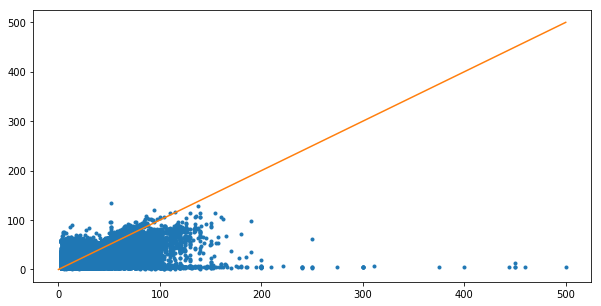

In [56]:
plt.plot(Y_test, Y_pred, '.');
line45 = np.linspace(0, max(Y_test[' fare_amount']), 10)
plt.plot(line45,line45);

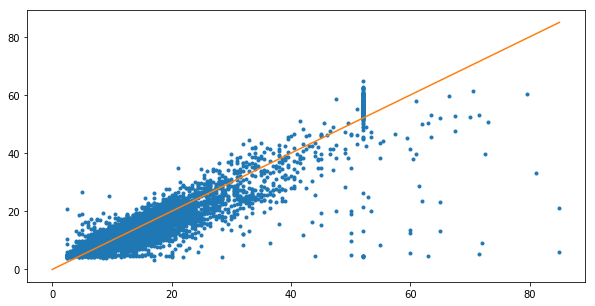

In [57]:
plt.plot(Y_test[0:10000], Y_pred[0:10000], '.');
line45 = np.linspace(0, max(Y_test[' fare_amount'][0:10000]), 10)
plt.plot(line45,line45);

In [58]:
r2_score(Y_test, Y_pred)

0.7973695968349002

In [59]:
mean_squared_error(Y_test, Y_pred)

18.516786585267834

In [60]:
#plt1=Plotting.qagPlot(auto_update=False)

In [61]:
#plt1.addData('id2',x = np.array(Y_test).T[0:10],              
#                y = Y_pred.T[0:10],
#                mode = 'markers+lines',
#                type = 'scatter',
#                name = 'yes2')

In [62]:
#plt1.plot()

In [63]:
#plt1.dict

In [64]:
tmpp = np.array(Y_pred)[0:50]

In [65]:
tmpp

array([[15.44424181],
       [ 8.25571029],
       [16.66790798],
       [17.04471876],
       [ 8.96823019],
       [ 5.68779268],
       [ 9.32277681],
       [ 8.10171005],
       [ 5.55191904],
       [ 7.88402252],
       [ 7.34982585],
       [ 8.61769316],
       [ 7.93092542],
       [14.74396353],
       [10.28144916],
       [ 7.67087734],
       [ 6.9785697 ],
       [11.09318717],
       [ 6.29023579],
       [17.12059466],
       [ 5.60237966],
       [ 7.54294662],
       [ 8.38179644],
       [ 8.09604949],
       [21.83871554],
       [ 8.78426745],
       [10.56045636],
       [ 9.16949091],
       [12.1772836 ],
       [11.27039305],
       [19.20933753],
       [22.22720572],
       [12.45309254],
       [10.91123682],
       [ 7.96447516],
       [ 6.93649514],
       [22.85182214],
       [ 7.33392969],
       [57.5634315 ],
       [ 7.44466314],
       [10.13841617],
       [11.82653322],
       [53.6597837 ],
       [10.4503445 ],
       [24.91094783],
       [ 5

In [66]:
tmpy = np.array(Y_test)[0:50]

In [67]:
tmpy

array([[11.5],
       [ 6.5],
       [14.5],
       [15.5],
       [ 6. ],
       [ 4.5],
       [11.5],
       [12.5],
       [ 4.5],
       [ 5.5],
       [ 8. ],
       [ 8.5],
       [ 6.5],
       [12. ],
       [13.5],
       [ 5. ],
       [ 6. ],
       [11.5],
       [ 4. ],
       [ 7.5],
       [ 6. ],
       [ 4.5],
       [ 7.5],
       [ 6.5],
       [20. ],
       [ 7.5],
       [10.5],
       [ 8.5],
       [15. ],
       [10.5],
       [24. ],
       [17.5],
       [ 9.5],
       [10.5],
       [ 5.5],
       [ 6. ],
       [22. ],
       [ 5. ],
       [52. ],
       [ 6.5],
       [10. ],
       [15. ],
       [52. ],
       [ 8.5],
       [29.5],
       [ 4. ],
       [ 6. ],
       [52. ],
       [ 3.5],
       [ 7.5]])

In [68]:
type(tmpy)

numpy.ndarray

In [69]:
np.isnan(Y_pred)

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [70]:
#Y_pred.isnull().sum()

In [71]:
type(Y_pred)

numpy.ndarray

In [72]:
tmpy=pd.DataFrame(Y_pred, columns=['Y_pred'])

In [73]:
tmpy[tmpy['Y_pred']<1.7]

,Y_pred
2617868,1.575464
3503766,1.499453
3986483,1.495368


In [74]:
tmpy.iloc[3503766]

Y_pred    1.499453
Name: 3503766, dtype: float64

In [75]:
X_test.iloc[261868]

 pickup_latitude            40.745144
 pickup_longitude          -73.975563
 dropoff_latitude           40.732941
 dropoff_longitude         -73.996033
pickup_dt_secmidnight    40320.000000
L1distance                   0.032673
Name: 13160160, dtype: float64

In [76]:
#X_test[X_test['L0distance']<0.002]
df_remove_outlier_latitudelongitude[df_remove_outlier_latitudelongitude['L1distance']<0.002]

,medallion,hack_license,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,rate_code,dropoff_datetime,dropoff_latitude,dropoff_longitude,passenger_count,pickup_latitude,pickup_longitude,store_and_fwd_flag,trip_distance,trip_time_in_secs,pickup_dt_hour,pickup_dt_day,total_income,pickup_dt_secmidnight,L1distance,L2distance
56,69D959302A72045B426E936BB0BB2723,5EE1CD0A797F45CA403AD5D4AB224ED1,CMT,2013-04-05 06:21:22,CRD,15.0,0.0,0.5,4.65,0.0,20.15,1,2013-04-05 06:21:23,40.709526,-74.011452,1,40.709507,-74.011414,N,4.40,1,6,Friday,19.65,22882,0.000057,0.000042
118,302EB02F36343A64C452D49463A27C88,480A82787EB8CDAB4C2608EF01BBBE30,CMT,2013-04-05 14:45:02,CRD,12.0,0.0,0.5,2.50,0.0,15.00,1,2013-04-05 15:00:26,40.757435,-73.948830,1,40.757435,-73.948830,N,2.30,924,14,Friday,14.50,53102,0.000000,0.000000
139,0FE34002F6E240EBAE51520DEF0D2259,4584215C3E9287BEBC2E17B1ACB51CE5,CMT,2013-04-04 13:14:55,CRD,7.5,0.0,0.5,2.00,0.0,10.00,1,2013-04-04 13:21:22,40.727135,-73.999748,1,40.727135,-73.999748,N,1.90,386,13,Thursday,9.50,47695,0.000000,0.000000
613,7177FBDAE37C7F1EF3A56BD716EA33BE,C323843290235F0ADC1A5F9F7C012812,VTS,2013-04-12 20:19:00,CRD,6.5,0.5,0.5,0.00,0.0,7.50,1,2013-04-12 20:27:00,40.731182,-73.986298,1,40.731182,-73.986298,NaN,0.89,480,20,Friday,7.00,73140,0.000000,0.000000
675,2738B228E82A4A66EFA95DE4EDEA4FD1,85FBAA801C51CF31386AF203EB5F8DC4,VTS,2013-04-12 20:20:00,CRD,8.5,0.5,0.5,1.80,0.0,11.30,1,2013-04-12 20:29:00,40.741623,-73.993538,1,40.741623,-73.993538,NaN,1.79,540,20,Friday,10.80,73200,0.000000,0.000000
676,5AB0A871E990B11F8199DB1AFDE11955,B1515483BAAFBC7DB7677DE5F46764A0,VTS,2013-04-12 20:21:00,CRD,5.5,0.5,0.5,1.20,0.0,7.70,1,2013-04-12 20:27:00,40.735958,-73.982292,1,40.735958,-73.982292,NaN,0.45,360,20,Friday,7.20,73260,0.000000,0.000000
715,39C31922F7C2A7FED7294A281105872E,F5F32E4E5508BAE06298F105ACA90789,VTS,2013-04-12 20:27:00,CSH,3.0,0.5,0.5,0.00,0.0,4.00,1,2013-04-12 20:28:00,40.751938,-73.993744,1,40.751228,-73.994041,NaN,0.07,60,20,Friday,3.50,73620,0.001007,0.000770
902,C7CD5A324582EFE8885A3B2B02124B3F,2590F0470D831D60C93B71D3142136B8,VTS,2013-04-12 21:20:00,CRD,6.5,0.5,0.5,1.40,0.0,8.90,1,2013-04-12 21:27:00,40.737492,-73.995354,1,40.737492,-73.995354,NaN,1.19,420,21,Friday,8.40,76800,0.000000,0.000000
1036,0CB35227E0ED3889C33974E137C76739,40CD6A3646AC06C944C1E5EAE353FD5D,VTS,2013-04-12 20:24:00,CSH,4.0,0.5,0.5,0.00,0.0,5.00,1,2013-04-12 20:28:00,40.724754,-73.999039,1,40.723358,-73.999023,NaN,0.27,240,20,Friday,4.50,73440,0.001412,0.001396
1110,38010D372ED4B399962049CFD5C15BC5,02D3AD1A310B4B7E0A17A46872B561CD,VTS,2013-04-13 00:33:00,CSH,3.0,0.5,0.5,0.00,0.0,4.00,1,2013-04-13 00:35:00,40.750095,-73.976265,1,40.750092,-73.976685,NaN,0.34,120,0,Saturday,3.50,1980,0.000423,0.000420


In [77]:
tmpy.isnull().sum()

Y_pred    0
dtype: int64

In [78]:
type(tmpy)

pandas.core.frame.DataFrame

In [79]:
tmpy.columns

Index(['Y_pred'], dtype='object')

In [80]:
tmpy[tmpy<5]

,Y_pred
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


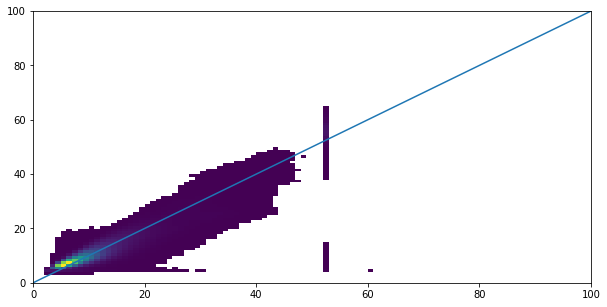

In [81]:
plt.hist2d(np.array(Y_test)[:,0],np.array(Y_pred)[:,0], bins=100,range=[[0,100],[0,100]],cmin=100)
line45 = np.linspace(0, max(Y_test[' fare_amount']), 10);
plt.plot(line45,line45);

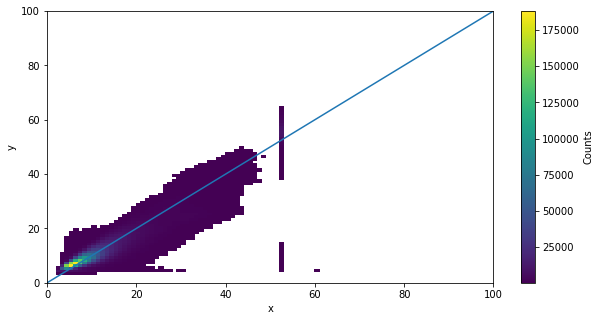

In [83]:
H, xedges_bin, yedges_bin = np.histogram2d(np.array(Y_test)[:,0],np.array(Y_pred)[:,0], bins=100,range=[[0,100],[0,100]])
 
# H needs to be rotated and flipped
H = np.rot90(H)
H = np.flipud(H)
 
# Mask zeros
Hmasked = np.ma.masked_where(H<100,H) # Mask pixels with a value of zero
 
# Plot 2D histogram using pcolor
#fig2 = plt.figure()
plt.pcolormesh(xedges_bin,yedges_bin,Hmasked)
plt.xlabel('x')
plt.ylabel('y')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Counts');
line45 = np.linspace(0, max(xedges_bin), 10);
plt.plot(line45,line45);

In [84]:
type(Y_test)

pandas.core.frame.DataFrame

In [85]:
np.array(Y_test)[:,0].shape

(4887863,)

In [86]:
np.array(Y_pred)[:,0].shape

(4887863,)

## Now try normalising the inputs

In [87]:
scaler=StandardScaler().fit(X_train)

In [88]:
Xscaled=scaler.transform(X)

In [89]:
Xscaled

array([[ 0.53186021,  0.50918939,  1.11751507, -0.04102418,  0.72775869,
        -0.11812799],
       [ 0.14940548, -0.21951668, -1.17609411, -1.05003554,  0.60436689,
         0.42086284],
       [ 0.46266293, -0.08088053,  0.82357643,  0.59072307,  0.63574059,
        -0.17965101],
       ...,
       [-3.86051944,  5.65220901,  0.37646722, -0.22695843,  0.49921562,
         5.40777753],
       [-0.59436345, -0.13309112,  0.3813303 , -0.21457303,  0.58419501,
        -0.28736587],
       [ 0.52464059,  0.58827693, -0.65913939, -0.21947814,  0.59449554,
         0.32060531]])

In [90]:
X_train_scaled, X_test_scaled, Y_train_scaled, Y_test_scaled = train_test_split(Xscaled,Y,test_size=0.33,random_state=18)

In [91]:
X_train_scaled

array([[ 0.29572311,  0.25259167,  1.27688687,  0.7006588 , -0.21409628,
         0.02923372],
       [ 2.39104188,  0.90552978,  1.55878206,  0.14212029,  0.7618792 ,
        -0.0452008 ],
       [-0.76904123, -0.23684256,  0.0941151 ,  0.28081222,  1.4211133 ,
        -0.05737847],
       ...,
       [-0.29550822, -0.20041454,  0.36142106,  0.16762685, -0.5643144 ,
        -0.24664803],
       [-0.88685061, -0.39545443, -0.29473511, -0.30366205,  1.46489056,
        -0.5006536 ],
       [ 0.44118919,  0.05309655, -0.94501643, -0.37923137,  0.18504937,
         0.18845577]])

In [92]:
model_scaled=LinearRegression()

In [93]:
model_scaled.fit(X_train_scaled,Y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [94]:
model_scaled.score(X_test_scaled, Y_test_scaled)

0.797369596834901

In [95]:
Y_pred_scaled = model_scaled.predict(X_test_scaled)

In [96]:
Y_pred_scaled

array([[15.44424181],
       [ 8.25571029],
       [16.66790798],
       ...,
       [10.48335081],
       [11.85315329],
       [ 7.20805969]])

In [97]:
Y_test_scaled

,fare_amount
6431835,11.5
13143808,6.5
10221206,14.5
2540118,15.5
10216971,6.0
11195174,4.5
10038547,11.5
10515721,12.5
11115278,4.5
11041025,5.5


In [98]:
model_scaled.score(X_test_scaled,Y_test_scaled)     #R^2

0.797369596834901

In [99]:
model_scaled.coef_

array([[ 2.80706701e-01,  1.16242906e-01, -6.07403864e-01,
        -2.64356561e-01,  2.02584342e-03,  8.53946951e+00]])

In [100]:
model.coef_

array([[ 1.03927982e+01,  3.38489155e+00, -1.98245024e+01,
        -8.10435919e+00,  8.69469435e-08,  1.69366197e+02]])

In [101]:
model.intercept_

array([39.85671864])

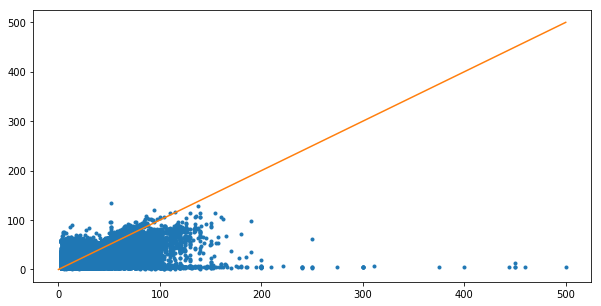

In [102]:
plt.plot(Y_test_scaled, Y_pred_scaled, '.');
line45 = np.linspace(0, max(Y_test_scaled[' fare_amount']), 10)
plt.plot(line45,line45);

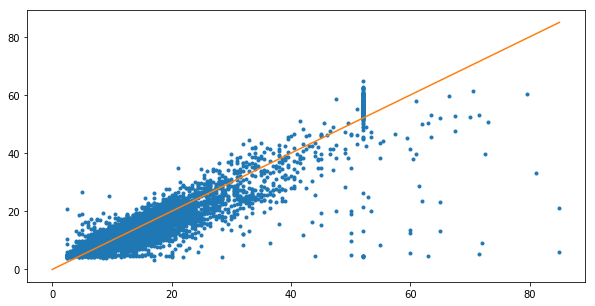

In [103]:
plt.plot(Y_test_scaled[0:10000], Y_pred_scaled[0:10000], '.');
line45 = np.linspace(0, max(Y_test_scaled[' fare_amount'][0:10000]), 10)
plt.plot(line45,line45);

In [104]:
r2_score(Y_test_scaled, Y_pred_scaled)

0.797369596834901

In [105]:
mean_squared_error(Y_test_scaled, Y_pred_scaled)

18.516786585267752

In [106]:
Y_test_scaled.max()

 fare_amount    500.0
dtype: float64

In [107]:
max(Y_test_scaled[' fare_amount'])

500.0

In [108]:
max(Y_test_scaled[' fare_amount'][0:10000])

85.0

In [109]:
Y_test_scaled[0:10000].max()

 fare_amount    85.0
dtype: float64

In [110]:
Y_test_scaled.mean()

 fare_amount    12.193482
dtype: float64

In [111]:
mean_squared_error(Y_test_scaled, 12.19*np.ones(len(Y_test_scaled)))

91.38208655884993

# Pipeline the model fit and display

In [112]:
def FitModel(X,Y,test_size=0.33,random_state=18):
    print('Doing Train Test split')
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=test_size,random_state=random_state)
    print('Doing scaling')
    scaler=StandardScaler().fit(X_train)
    Xscaled=scaler.transform(X)
    print('Doing Scaled Train Test split')
    X_train_scaled, X_test_scaled, Y_train_scaled, Y_test_scaled = train_test_split(Xscaled,Y,test_size=test_size,random_state=random_state)
    model_scaled=LinearRegression()
    print('Fitting model')
    model_scaled.fit(X_train_scaled,Y_train_scaled)
    print('R2 Score:', model_scaled.score(X_test_scaled, Y_test_scaled))
    Y_pred_scaled = model_scaled.predict(X_test_scaled)
    print('Coeff:', model_scaled.coef_)
    print('Intercept:', model_scaled.intercept_)
    print('R2:', r2_score(Y_test_scaled, Y_pred_scaled))
    print('MSE:', mean_squared_error(Y_test_scaled, Y_pred_scaled))
    
    print('Plotting')
    plt.plot(Y_test_scaled, Y_pred_scaled, '.');
    #line45 = np.linspace(0, max(Y_test_scaled[' fare_amount']), 10)
    line45 = np.linspace(0, Y_test_scaled.max(), 10)
    plt.plot(line45,line45);
    plt.xlabel('Y_test_actual')
    plt.ylabel('Y_test_predicted')
    plt.title('Comparison of actual and predicted values',size='x-large');
    
    plt.plot(Y_test_scaled[0:10000], Y_pred_scaled[0:10000], '.');
    #line45 = np.linspace(0, max(Y_test_scaled[' fare_amount'][0:10000]), 10)
    line45 = np.linspace(0, Y_test_scaled[0:10000].max(), 10)
    plt.plot(line45,line45);
    
    return Y_test_scaled, Y_pred_scaled

In [113]:
def FitModel1(X,Y,test_size=0.33,random_state=18,bins=100,cmin=100):
    print('Doing Train Test split')
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=test_size,random_state=random_state)
    print('Doing scaling')
    scaler=StandardScaler().fit(X_train)
    Xscaled=scaler.transform(X)
    print('Doing Scaled Train Test split')
    X_train_scaled, X_test_scaled, Y_train_scaled, Y_test_scaled = train_test_split(Xscaled,Y,test_size=test_size,random_state=random_state)
    model_scaled=LinearRegression()
    print('Fitting model')
    model_scaled.fit(X_train_scaled,Y_train_scaled)
    print('R2 Score:', model_scaled.score(X_test_scaled, Y_test_scaled))
    Y_pred_scaled = model_scaled.predict(X_test_scaled)
    print('Coeff:', model_scaled.coef_)
    print('Intercept:', model_scaled.intercept_)
    print('R2:', r2_score(Y_test_scaled, Y_pred_scaled))
    print('MSE:', mean_squared_error(Y_test_scaled, Y_pred_scaled))
    
    print('Plotting')
#    plt.plot(Y_test_scaled, Y_pred_scaled, '.');
    #line45 = np.linspace(0, max(Y_test_scaled[' fare_amount']), 10)
#    line45 = np.linspace(0, Y_test_scaled.max(), 10)
#    plt.plot(line45,line45);
#    plt.xlabel('Y_test_actual')
#    plt.ylabel('Y_test_predicted')
#    plt.title('Comparison of actual and predicted values',size='x-large');
    
#    plt.plot(Y_test_scaled[0:10000], Y_pred_scaled[0:10000], '.');
    #line45 = np.linspace(0, max(Y_test_scaled[' fare_amount'][0:10000]), 10)
#    line45 = np.linspace(0, Y_test_scaled[0:10000].max(), 10)
#    plt.plot(line45,line45);
    
    H, xedges_bin, yedges_bin = np.histogram2d(np.array(Y_test_scaled)[:,0],np.array(Y_pred_scaled)[:,0], bins=bins,range=[[0,bins],[0,bins]])
 
    # H needs to be rotated and flipped
    H = np.rot90(H)
    H = np.flipud(H)
 
    # Mask zeros
    Hmasked = np.ma.masked_where(H<cmin,H) # Mask pixels with a value of zero
 
    # Plot 2D histogram using pcolor
    #fig2 = plt.figure()
    plt.pcolormesh(xedges_bin,yedges_bin,Hmasked)
    plt.xlabel('Y_test_actual')
    plt.ylabel('Y_test_predicted')
    cbar = plt.colorbar()
    cbar.ax.set_ylabel('Counts');
    line45 = np.linspace(0, max(xedges_bin), 10);
    plt.plot(line45,line45);
    
    return Y_test_scaled, Y_pred_scaled

Doing Train Test split
Doing scaling
Doing Scaled Train Test split
Fitting model
R2 Score: 0.797369596834901
Coeff: [[ 2.80706701e-01  1.16242906e-01 -6.07403864e-01 -2.64356561e-01
   2.02584342e-03  8.53946951e+00]]
Intercept: [12.19312845]
R2: 0.797369596834901
MSE: 18.516786585267752
Plotting


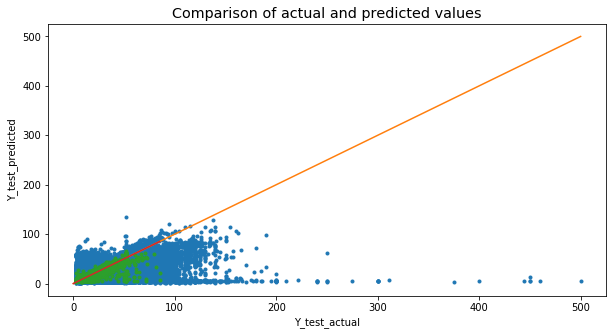

In [114]:
FitModel(X,Y,0.33,18);

Doing Train Test split
Doing scaling
Doing Scaled Train Test split
Fitting model
R2 Score: 0.797369596834901
Coeff: [[ 2.80706701e-01  1.16242906e-01 -6.07403864e-01 -2.64356561e-01
   2.02584342e-03  8.53946951e+00]]
Intercept: [12.19312845]
R2: 0.797369596834901
MSE: 18.516786585267752
Plotting


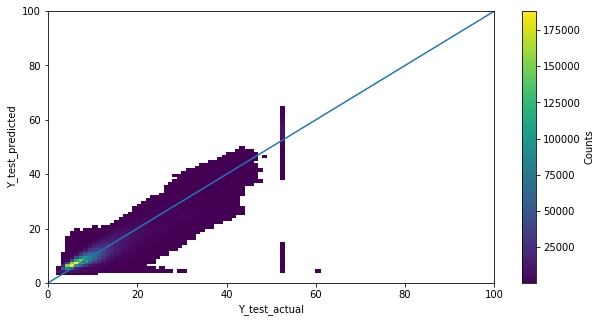

In [115]:
FitModel1(X,Y,0.33,18);

Doing Train Test split
Doing scaling
Doing Scaled Train Test split
Fitting model
R2 Score: 0.7947754169960952
Coeff: [[ 2.77286573e-01  1.15368366e-01 -6.07074864e-01 -2.66644855e-01
   3.60582745e-03  8.54225253e+00]]
Intercept: [12.19429937]
R2: 0.7947754169960951
MSE: 18.793721963260147
Plotting


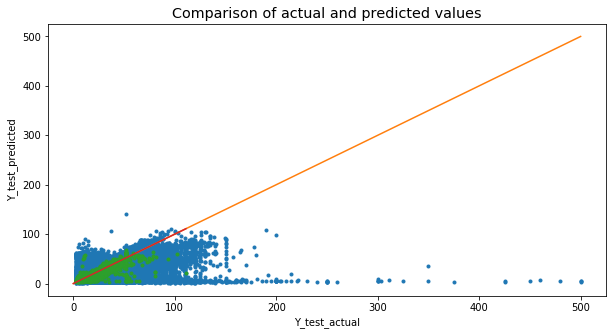

In [116]:
FitModel(X,Y,0.33,19);

Doing Train Test split
Doing scaling
Doing Scaled Train Test split
Fitting model
R2 Score: 0.7947754169960952
Coeff: [[ 2.77286573e-01  1.15368366e-01 -6.07074864e-01 -2.66644855e-01
   3.60582745e-03  8.54225253e+00]]
Intercept: [12.19429937]
R2: 0.7947754169960951
MSE: 18.793721963260147
Plotting


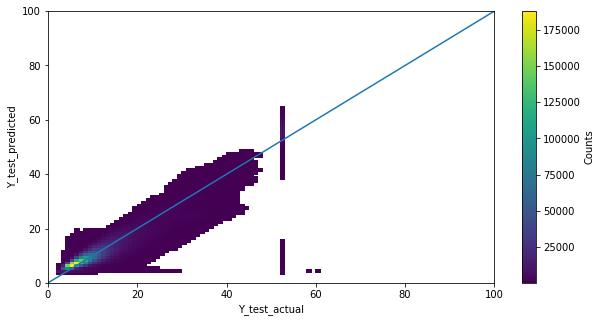

In [117]:
FitModel1(X,Y,0.33,19);

Tried a different random number seed (19). No material impact.

Doing Train Test split
Doing scaling
Doing Scaled Train Test split
Fitting model
R2 Score: 0.7928975488609228
Coeff: [[8.51550148]]
Intercept: [12.19312845]
R2: 0.7928975488609228
MSE: 18.925451606112446
Plotting


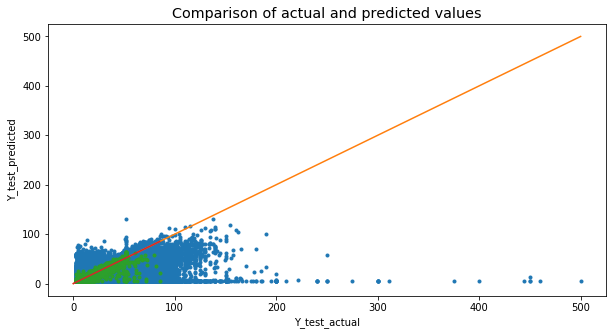

In [118]:
FitModel(df_remove_outlier_latitudelongitude[['L1distance']],Y,0.33,18);

Doing Train Test split
Doing scaling
Doing Scaled Train Test split
Fitting model
R2 Score: 0.7928975488609228
Coeff: [[8.51550148]]
Intercept: [12.19312845]
R2: 0.7928975488609228
MSE: 18.925451606112446
Plotting


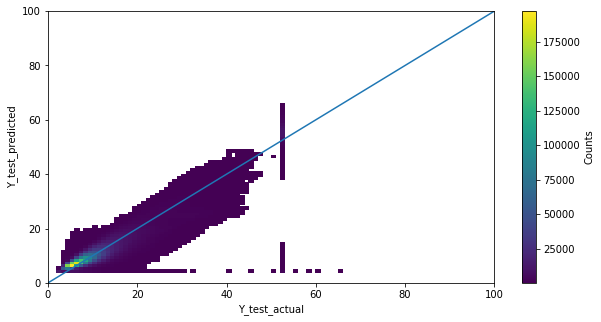

In [119]:
FitModel1(df_remove_outlier_latitudelongitude[['L1distance']],Y,0.33,18);

Only L1 distance has large coefficient. So tried only using that feature. Minimal impact.

Doing Train Test split
Doing scaling
Doing Scaled Train Test split
Fitting model
R2 Score: 0.7929008089438128
Coeff: [[0.01384591 8.51587868]]
Intercept: [12.19312845]
R2: 0.7929008089438128
MSE: 18.92515369297512
Plotting


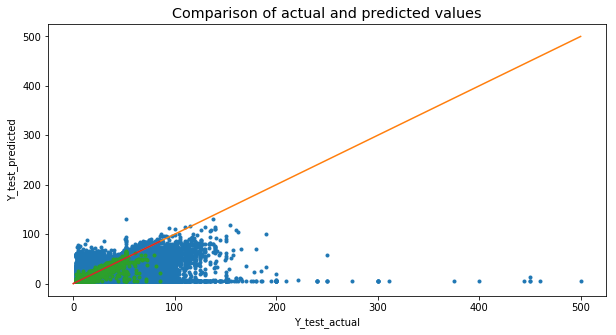

In [120]:
FitModel(df_remove_outlier_latitudelongitude[['pickup_dt_secmidnight','L1distance']],Y,0.33,18);

Adding time from midnight has minimal effect. <br>
Best to just use L1 distance. <br>
Let's try L2 distance

Doing Train Test split
Doing scaling
Doing Scaled Train Test split
Fitting model
R2 Score: 0.8165725809477113
Coeff: [[8.64109176]]
Intercept: [12.19312845]
R2: 0.8165725809477113
MSE: 16.761978061655036
Plotting


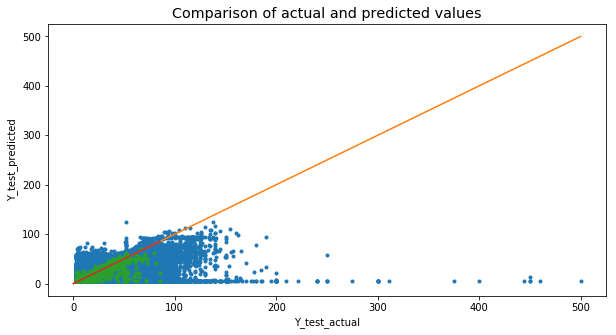

In [121]:
FitModel(df_remove_outlier_latitudelongitude[['L2distance']],Y,0.33,18);

Using L2 norm gives a 2% improvement in R2 and MSE improvement of 2. <br>
Let's try both next.

Doing Train Test split
Doing scaling
Doing Scaled Train Test split
Fitting model
R2 Score: 0.8204892457159568
Coeff: [[-5.18409642 13.79087603]]
Intercept: [12.19312845]
R2: 0.8204892457159569
MSE: 16.40406511025776
Plotting


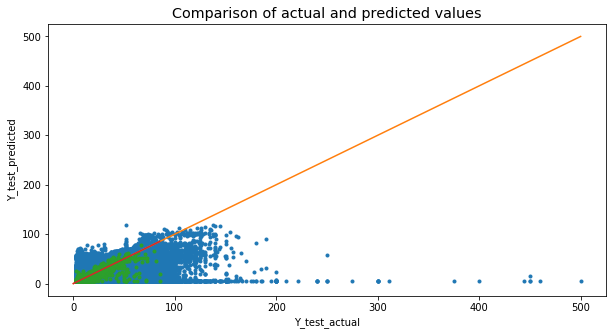

In [122]:
FitModel(df_remove_outlier_latitudelongitude[['L1distance','L2distance']],Y,0.33,18);

Minimal impact. <br>
As a last test, let's try all the features.

Doing Train Test split
Doing scaling
Doing Scaled Train Test split
Fitting model
R2 Score: 0.8243109006109972
Coeff: [[ 0.20166264 -0.09692657 -0.38562041 -0.42594257  0.01926245 -5.03036643
  13.84051925]]
Intercept: [12.19312845]
R2: 0.8243109006109972
MSE: 16.054834358165998
Plotting


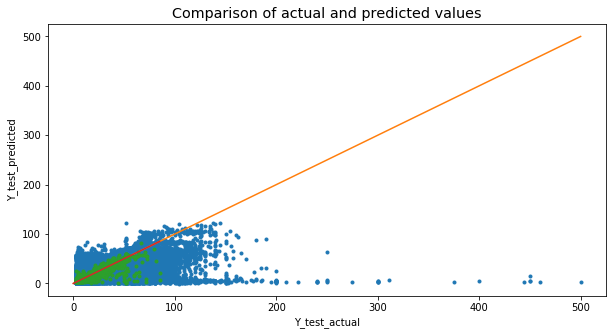

In [123]:
FitModel(df_remove_outlier_latitudelongitude[[' pickup_latitude', ' pickup_longitude', ' dropoff_latitude', ' dropoff_longitude', 'pickup_dt_secmidnight', 'L1distance','L2distance']],Y,0.33,18);

Doing Train Test split
Doing scaling
Doing Scaled Train Test split
Fitting model
R2 Score: 0.8243109006109972
Coeff: [[ 0.20166264 -0.09692657 -0.38562041 -0.42594257  0.01926245 -5.03036643
  13.84051925]]
Intercept: [12.19312845]
R2: 0.8243109006109972
MSE: 16.054834358165998
Plotting


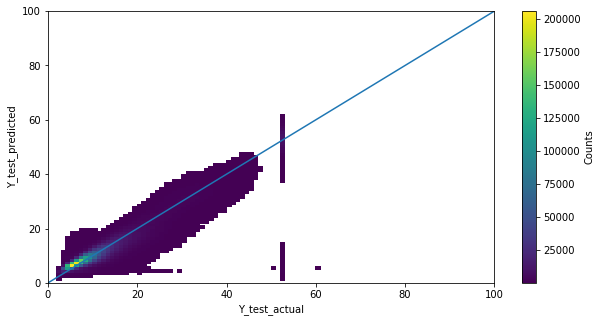

In [124]:
FitModel1(df_remove_outlier_latitudelongitude[[' pickup_latitude', ' pickup_longitude', ' dropoff_latitude', ' dropoff_longitude', 'pickup_dt_secmidnight', 'L1distance','L2distance']],Y,0.33,18);

Minimal improvement. <br><br>
Conclusion: we can use the L2 distance as a single feature for the linear regression model.

# Model to predict Tip

In [125]:
Ytip=df_remove_outlier_latitudelongitude[[' tip_amount']]

In [126]:
df_remove_outlier_latitudelongitude.columns

Index(['medallion', ' hack_license', ' vendor_id', ' pickup_datetime',
       ' payment_type', ' fare_amount', ' surcharge', ' mta_tax',
       ' tip_amount', ' tolls_amount', ' total_amount', ' rate_code',
       ' dropoff_datetime', ' dropoff_latitude', ' dropoff_longitude',
       ' passenger_count', ' pickup_latitude', ' pickup_longitude',
       ' store_and_fwd_flag', ' trip_distance', ' trip_time_in_secs',
       'pickup_dt_hour', 'pickup_dt_day', 'total_income',
       'pickup_dt_secmidnight', 'L1distance', 'L2distance'],
      dtype='object')

Doing Train Test split
Doing scaling
Doing Scaled Train Test split
Fitting model
R2 Score: 0.24550555542626737
Coeff: [[ 0.06886576 -0.09017084 -0.07762266 -0.10562066  0.03730779 -1.24099404
   2.3349308 ]]
Intercept: [1.33689365]
R2: 0.2455055554262674
MSE: 3.252158135657252
Plotting


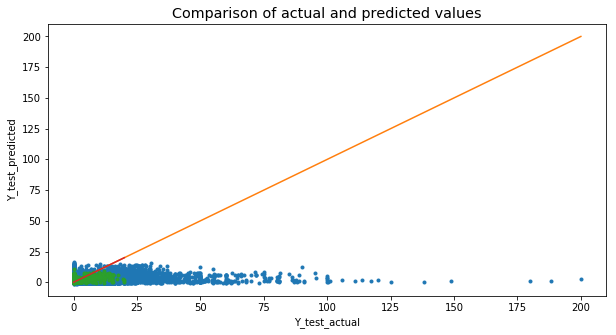

In [127]:
FitModel(df_remove_outlier_latitudelongitude[[' pickup_latitude', ' pickup_longitude', ' dropoff_latitude', ' dropoff_longitude', 'pickup_dt_secmidnight', 'L1distance','L2distance']],Ytip,0.33,18);

Doing Train Test split
Doing scaling
Doing Scaled Train Test split
Fitting model
R2 Score: 0.24550555542626737
Coeff: [[ 0.06886576 -0.09017084 -0.07762266 -0.10562066  0.03730779 -1.24099404
   2.3349308 ]]
Intercept: [1.33689365]
R2: 0.2455055554262674
MSE: 3.252158135657252
Plotting


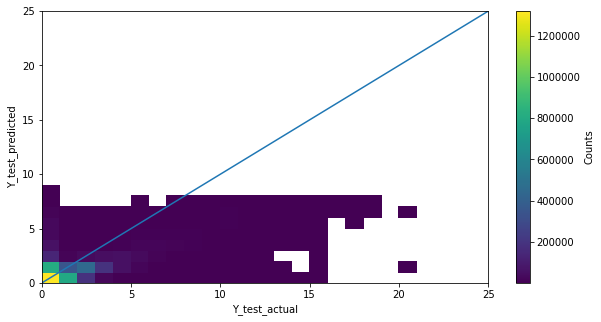

In [128]:
FitModel1(df_remove_outlier_latitudelongitude[[' pickup_latitude', ' pickup_longitude', ' dropoff_latitude', ' dropoff_longitude', 'pickup_dt_secmidnight', 'L1distance','L2distance']],Ytip,0.33,18,bins=25);

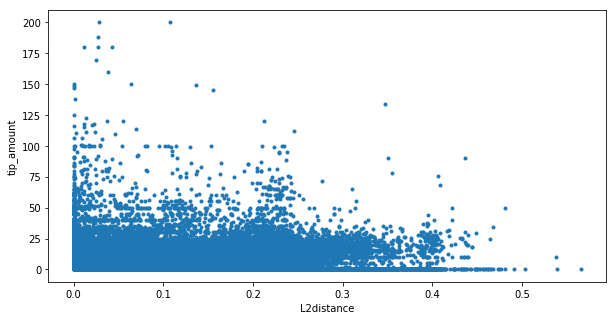

In [129]:
plt.plot(df_remove_outlier_latitudelongitude[['L2distance']], df_remove_outlier_latitudelongitude[[' tip_amount']], '.');
plt.xlabel('L2distance');
plt.ylabel('tip_amount');

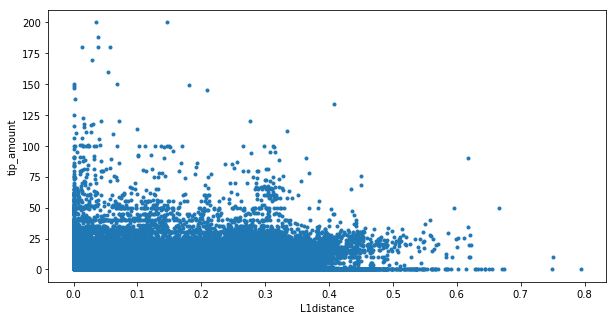

In [130]:
plt.plot(df_remove_outlier_latitudelongitude[['L1distance']], df_remove_outlier_latitudelongitude[[' tip_amount']], '.');
plt.xlabel('L1distance');
plt.ylabel('tip_amount');

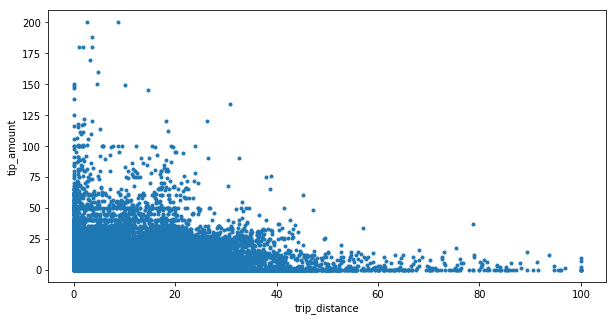

In [131]:
plt.plot(df_remove_outlier_latitudelongitude[[' trip_distance']], df_remove_outlier_latitudelongitude[[' tip_amount']], '.');
plt.xlabel('trip_distance');
plt.ylabel('tip_amount');

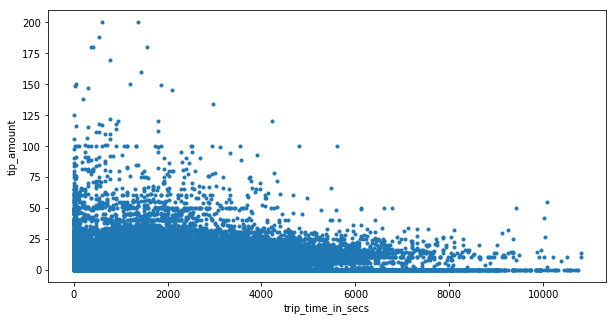

In [132]:
plt.plot(df_remove_outlier_latitudelongitude[[' trip_time_in_secs']], df_remove_outlier_latitudelongitude[[' tip_amount']], '.');
plt.xlabel('trip_time_in_secs');
plt.ylabel('tip_amount');
#plt.title('Comparison of actual and predicted values',size='x-large');

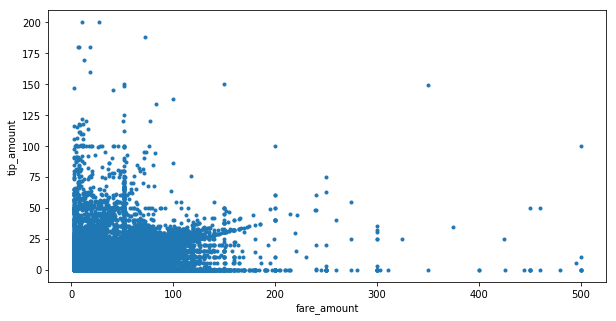

In [133]:
plt.plot(df_remove_outlier_latitudelongitude[[' fare_amount']], df_remove_outlier_latitudelongitude[[' tip_amount']], '.');
plt.xlabel('fare_amount');
plt.ylabel('tip_amount');

See a bit of structure: <br>
    Some tips scale as percentage of fare amount.<br>
    Multiples of $50 tips <br>
    Zero tips (maybe paid cash)

Let's try adding fare_amount as a feature (even if it is not known at the start of the trip)

Doing Train Test split
Doing scaling
Doing Scaled Train Test split
Fitting model
R2 Score: 0.28285502123245676
Coeff: [[ 0.04856142 -0.08041182 -0.03879659 -0.06273477  0.03536836 -0.73451321
   0.94140256  0.9635041 ]]
Intercept: [1.33689365]
R2: 0.28285502123245676
MSE: 3.0911677268376407
Plotting


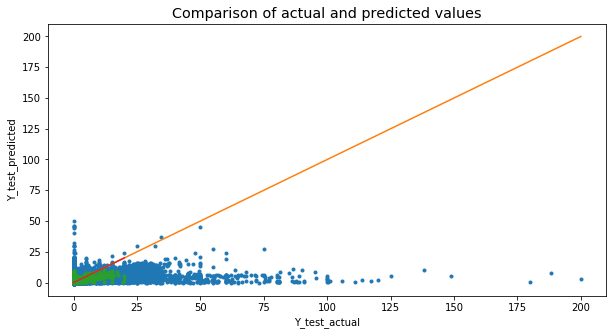

In [134]:
FitModel(df_remove_outlier_latitudelongitude[[' pickup_latitude', ' pickup_longitude', ' dropoff_latitude', ' dropoff_longitude', 'pickup_dt_secmidnight', 'L1distance','L2distance',' fare_amount']],Ytip,0.33,18);

R2 improves from 0.24 to 0.28. Nothing major.<br>
Let's remove some features (all the pickup and dropoff info)

Doing Train Test split
Doing scaling
Doing Scaled Train Test split
Fitting model
R2 Score: 0.28037011574762905
Coeff: [[ 0.03620611 -0.72080006  0.83042553  0.9929379 ]]
Intercept: [1.33689365]
R2: 0.28037011574762905
MSE: 3.1018786149653685
Plotting


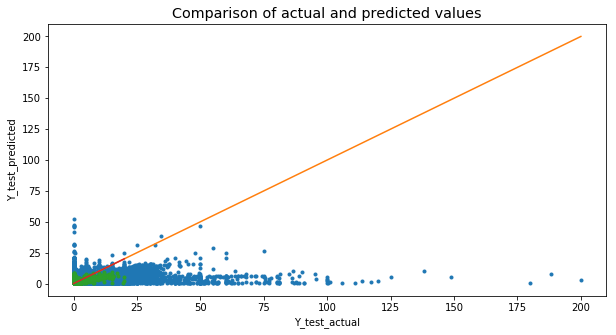

In [135]:
FitModel(df_remove_outlier_latitudelongitude[['pickup_dt_secmidnight', 'L1distance','L2distance',' fare_amount']],Ytip,0.33,18);

Minimal impact. <br>
Let's remove first two features as they have smaller weights

Doing Train Test split
Doing scaling
Doing Scaled Train Test split
Fitting model
R2 Score: 0.27856341179818045
Coeff: [[0.08764592 1.0214194 ]]
Intercept: [1.33689365]
R2: 0.27856341179818045
MSE: 3.1096661964249552
Plotting


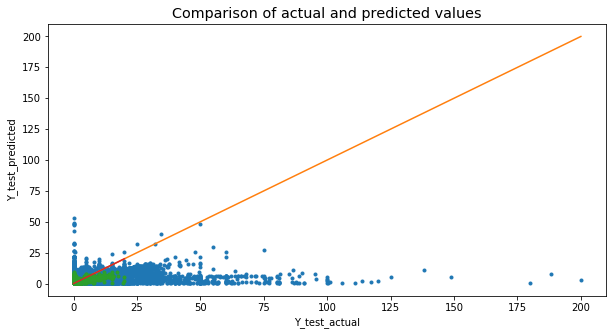

In [136]:
FitModel(df_remove_outlier_latitudelongitude[['L2distance',' fare_amount']],Ytip,0.33,18);

Minimal impact. <br>
Let's remove the fare_amount, as it is not known a priori

Doing Train Test split
Doing scaling
Doing Scaled Train Test split
Fitting model
R2 Score: 0.23470764690857637
Coeff: [[1.00996787]]
Intercept: [1.33689365]
R2: 0.23470764690857637
MSE: 3.298701229892666
Plotting


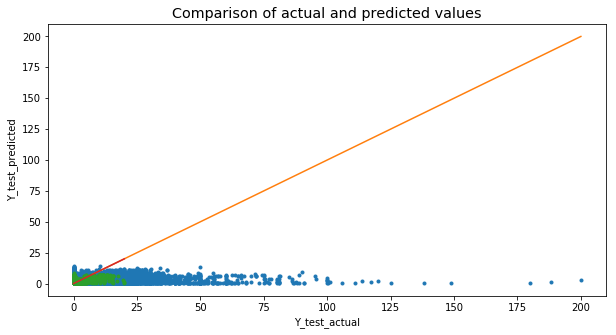

In [137]:
FitModel(df_remove_outlier_latitudelongitude[['L2distance']],Ytip,0.33,18);

R2 drops back to 0.23 which is similar to using all the original features (excluding fare_amount)

Not a great model